1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

--- Eigenvectors Eigendecomposition ---

 [[-0.11919707 -0.81649658  0.56491185]
 [-0.57267582 -0.40824829 -0.71089784]
 [-0.81106995  0.40824829  0.41892585]] 

Eigenvalues Eigendecomposition:  [ 2.63485201e+01 -3.52035006e-16  1.92623939e+00]

---Eigenvectors SVD ---

 [[-0.11919707 -0.81649658  0.56491185]
 [-0.57267582 -0.40824829 -0.71089784]
 [-0.81106995  0.40824829  0.41892585]] 

Eigenvalues SVD:  [2.63485201e+01 9.43883420e-16 1.92623939e+00]

Eigenvectors yield same result?:  True
Eigenvalues yield same result?  True 

Percentage of retained variability with component 0, 1 and 2:  100.0
Percentage of retained variability with component 0 and 1:  93.18742430519622
Percentage of retained variability with component 0 and 2:  100.0
Percentage of retained variability with component 1 and 2:  6.812575694803784


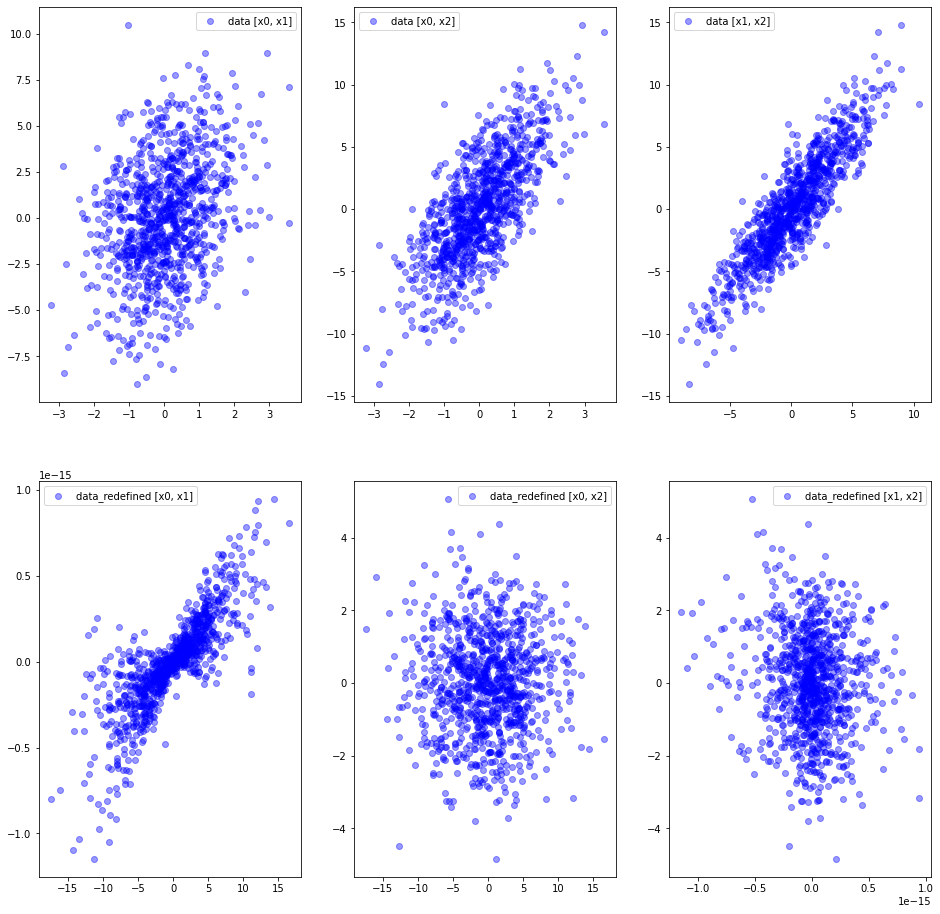

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la
from numpy.linalg import eig

N = 1000
x1 = np.random.normal(0, 1, size = N)
x2 = x1 + np.random.normal(0, 3, size = N)
x3 = (2 * x1) + x2
dataset = np.vstack((x1, x2, x3))

cov_matrix = np.cov(dataset)

l, V = la.eig(cov_matrix)
l = np.real_if_close(l)
print("--- Eigenvectors Eigendecomposition ---\n\n", V, "\n")
print("Eigenvalues Eigendecomposition: ", l)

U, S, Vt = la.svd(cov_matrix)

S[1], S[2] = S[2], S[1]
l_svd = S
U[:, [1, 2]] = U[:, [2, 1]]
V_svd = U

print("\n---Eigenvectors SVD ---\n\n", V_svd, "\n")
print("Eigenvalues SVD: ", l_svd)

print('\nEigenvectors yield same result?: ', np.allclose(V,V_svd))
print('Eigenvalues yield same result? ', np.allclose(l,l_svd), '\n')

print("Percentage of retained variability with component 0, 1 and 2: ", np.sum([l[0:3]]) / np.sum(l) * 100)
print("Percentage of retained variability with component 0 and 1: ", np.sum([l[0], l[1]]) / np.sum(l) * 100)
print("Percentage of retained variability with component 0 and 2: ", np.sum([l[0], l[2]]) / np.sum(l) * 100)
print("Percentage of retained variability with component 1 and 2: ", np.sum([l[1], l[2]]) / np.sum(l) * 100)
# Via using components 0 and 2, we get more than 99.9% variability. Mostly 100%
# When we consider how the dataset is created, this makes sense.
# When we have x1 and x3, we can calculate x2 without requaring an extra information. 

dataset_redefined = np.dot(V.T, dataset)

fig, axes = plt.subplots(2,3,figsize=(16, 16))
axes[0,0].scatter(dataset[0,:],dataset[1,:], label = "data [x0, x1]", alpha = 0.4, color = "blue")
axes[0,0].legend()
axes[0,1].scatter(dataset[0,:],dataset[2,:], label = "data [x0, x2]", alpha = 0.4, color = "blue")
axes[0,1].legend()
axes[0,2].scatter(dataset[1,:],dataset[2,:], label = "data [x1, x2]", alpha = 0.4, color = "blue")
axes[0,2].legend()
axes[1,0].scatter(dataset_redefined[0,:],dataset_redefined[1,:], label = "data_redefined [x0, x1]", alpha = 0.4, color = "blue")
axes[1,0].legend()
axes[1,1].scatter(dataset_redefined[0,:],dataset_redefined[2,:], label = "data_redefined [x0, x2]", alpha = 0.4, color = "blue")
axes[1,1].legend()
axes[1,2].scatter(dataset_redefined[1,:],dataset_redefined[2,:], label = "data_redefined [x1, x2]", alpha = 0.4, color = "blue")
axes[1,2].legend()
plt.show()

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [2]:
noises = np.random.normal(size=(N,3),scale=(1/50))
noised_dataset = dataset + np.sum(noises.T)

cov_matrix_noised = np.cov(noised_dataset)

l_n, V_n = la.eig(cov_matrix_noised)
l_n = np.real_if_close(l_n)
print("--- Eigenvectors Eigendecomposition ---\n\n", V_n, "\n")
print("Eigenvalues Eigendecomposition: ", l_n)

U_n, S_n, Vt_n = la.svd(cov_matrix_noised)

S_n[1], S_n[2] = S_n[2], S_n[1]
l_svd_n = S_n
U_n[:, [1, 2]] = U_n[:, [2, 1]]
V_svd_n = U_n

print("\n---Eigenvectors SVD ---\n\n", V_svd_n, "\n")
print("Eigenvalues SVD: ", l_svd_n)

print('\nEigenvectors yield same result?: ', np.allclose(V_n,V_svd_n))
print('Eigenvalues yield same result? ', np.allclose(l_n,l_svd_n), '\n')

print("Percentage of retained variability with component 0, 1 and 2: ", np.sum([l_n[0:3]]) / np.sum(l_n) * 100)
print("Percentage of retained variability with component 0 and 1: ", np.sum([l_n[0], l_n[1]]) / np.sum(l_n) * 100)
print("Percentage of retained variability with component 0 and 2: ", np.sum([l_n[0], l_n[2]]) / np.sum(l_n) * 100)
print("Percentage of retained variability with component 1 and 2: ", np.sum([l_n[1], l_n[2]]) / np.sum(l_n) * 100)

print("\nAs we see, the variability is exact the same compared to our first results.")
print("This is happening because the noise we added is not correlated with the 3 variables.")
print("That means the noise we added, did not effect the characteristic of our dataset.")

--- Eigenvectors Eigendecomposition ---

 [[-0.11919707 -0.81649658  0.56491185]
 [-0.57267582 -0.40824829 -0.71089784]
 [-0.81106995  0.40824829  0.41892585]] 

Eigenvalues Eigendecomposition:  [2.63485201e+01 5.68368719e-16 1.92623939e+00]

---Eigenvectors SVD ---

 [[-0.11919707 -0.81649658  0.56491185]
 [-0.57267582 -0.40824829 -0.71089784]
 [-0.81106995  0.40824829  0.41892585]] 

Eigenvalues SVD:  [2.63485201e+01 1.25851123e-16 1.92623939e+00]

Eigenvectors yield same result?:  True
Eigenvalues yield same result?  True 

Percentage of retained variability with component 0, 1 and 2:  100.0
Percentage of retained variability with component 0 and 1:  93.1874243051962
Percentage of retained variability with component 0 and 2:  100.0
Percentage of retained variability with component 1 and 2:  6.812575694803794

As we see, the variability is exact the same compared to our first results.
This is happening because the noise we added is not correlated with the 3 variables.
That means the 

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [3]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [4]:
data = pd.read_csv('magic04.data', header=None)
del data[10]
display(data)

cov_matrix = data.cov()

l, V = la.eig(cov_matrix)

l = np.real_if_close(l)

#print("--- Eigenvectors ---\n\n", V, "\n")
#print("Eigenvalues Eigendecomposition: ", l)

for i in range(1, len(l) + 1):
    retained_variability = np.sum(l[0:i])/np.sum(l)*100
    print("First ", i, " components, gives ", retained_variability, "% of retained variability")
    
print("\nTo reach at least 99% variability, we should retain at least the first 6 components.")

,0,1,2,3,4,5,6,7,8,9
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


First  1  components, gives  44.04728315643293 % of retained variability
First  2  components, gives  69.84635702474036 % of retained variability
First  3  components, gives  83.34468747519857 % of retained variability
First  4  components, gives  92.22645221247787 % of retained variability
First  5  components, gives  96.31124599383492 % of retained variability
First  6  components, gives  99.21390115548266 % of retained variability
First  7  components, gives  99.99934718055896 % of retained variability
First  8  components, gives  99.9999255476364 % of retained variability
First  9  components, gives  99.99999742052232 % of retained variability
First  10  components, gives  100.0 % of retained variability

To reach at least 99% variability, we should retain at least the first 6 components.
